In [1]:
print('Perceptron')

Perceptron


In [2]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets

In [3]:
# Create a random Binary ClassificationDataset

X,y = datasets.make_classification(n_samples=110,
                                   n_features=2,
                                   n_classes=2,
                                   n_redundant=0,
                                   n_clusters_per_class=1,
                                   random_state=111)

In [4]:
X.shape

(110, 2)

In [5]:
X

array([[-0.44193654, -0.34560667],
       [-0.90183151, -0.87165028],
       [-0.52679331,  2.64227684],
       [-0.82424115,  0.99326537],
       [-1.56054764,  1.35612462],
       [ 1.05409356, -0.62600405],
       [-0.42242299, -0.70438792],
       [ 0.88297495, -0.34248587],
       [-0.43385582,  2.33612008],
       [-1.05180553,  3.06588182],
       [-2.30173753,  2.96510833],
       [ 0.8747818 ,  0.54058374],
       [ 1.22124413, -1.72554515],
       [ 1.11308274, -1.30628681],
       [-0.98660851,  2.52285133],
       [-1.48522589,  2.52877879],
       [-0.02614976, -1.44524661],
       [-1.62535589,  1.7118749 ],
       [-1.8914247 ,  2.0801512 ],
       [ 0.99874014, -0.9111644 ],
       [-0.61389744,  2.8447813 ],
       [-1.28599466, -0.36207196],
       [-0.19797499,  1.41966717],
       [-0.65813717, -1.22594965],
       [ 0.73844677, -0.78598552],
       [ 1.23018341, -1.84348796],
       [-1.51913507,  0.56510435],
       [-1.18862901,  2.27767322],
       [ 0.90885449,

In [6]:
y.shape

(110,)

In [7]:
#y

In [8]:
y.shape

(110,)

In [9]:
# Create a DataFrame
l1 = []
l2 = []
for x1,x2 in X: #split the X into two features
    l1.append(x1)
    l2.append(x2)
dict_data = {'feature1':l1,'feature2':l2,'target':y}
df = pd.DataFrame(data=dict_data)
df.head(10)

,feature1,feature2,target
0,-0.441937,-0.345607,0
1,-0.901832,-0.871650,0
2,-0.526793,2.642277,0
3,-0.824241,0.993265,0
4,-1.560548,1.356125,0
5,1.054094,-0.626004,1
6,-0.422423,-0.704388,0
7,0.882975,-0.342486,1
8,-0.433856,2.336120,0
9,-1.051806,3.065882,0


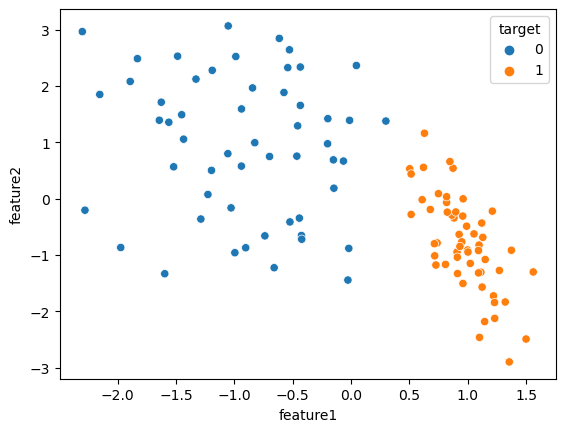

In [10]:
sns.scatterplot(data=df,x='feature1',y='feature2',hue='target')
plt.show()

Now there are two groups, now we will try to separate these by means of Line(Perceptron)

In [11]:
# Segregate the Dependent and Independent Feaatures
X = df[['feature1','feature2']]
y = df.target

In [12]:
from sklearn.linear_model import Perceptron

perc = Perceptron()
perc.fit(X,y)

Perceptron()

#### Weights and Biases

In [13]:
# Finding the weights
perc.coef_

array([[ 4.3624133 , -0.56847366]])

In [14]:
# Finding the Bias
perc.intercept_

array([-1.])

### Plot the graph with Perceptron

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


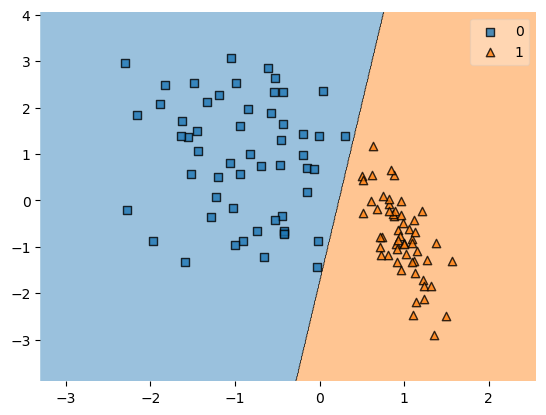

In [15]:


from mlxtend.plotting import  plot_decision_regions as pdr

pdr(X.values,y.values,clf=perc,legend=1)
plt.show()

In [16]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification

### Custom made Dataset

In [17]:
X,y = make_classification(n_samples=100,
                          n_features=2,
                          n_informative=1,
                          n_classes=2,
                          n_redundant=0,
                          n_clusters_per_class=1,
                          random_state=41,
                         hypercube= False,
                         class_sep=10)

#### Plot the Dataset

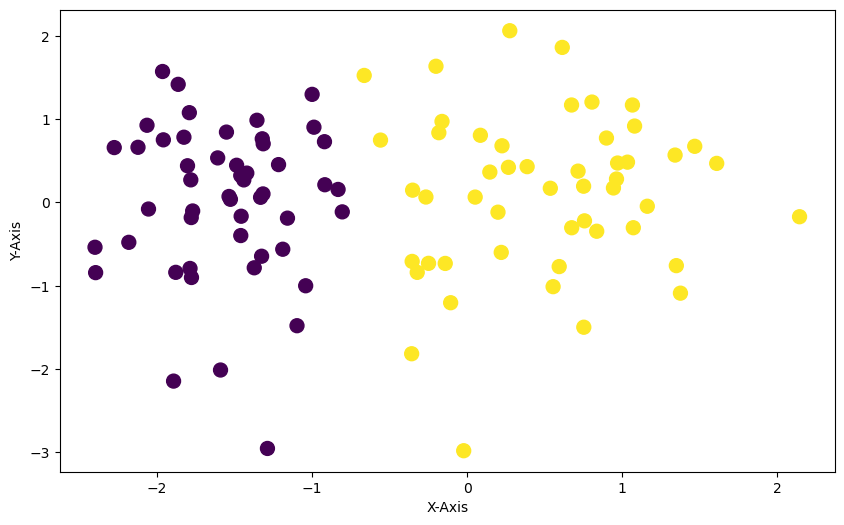

In [18]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,s=100)
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.show()

In [19]:
X.shape

(100, 2)

In [20]:
y.shape

(100,)

In [21]:
# Create a Perceptron Function

def perceptron(X,y):
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))  # Dot product of datapoints and weights
        weights = weights + lr * (y[j] - y_hat) * X[j]
        # weights + learning rate * (error) * datapoint
        
    return weights[0], weights[1:]

def step(z):
    return 1 if z>0 else 0

In [22]:
#np.random.randint(0,100)

In [23]:
#np.insert(X,0,1,axis=1)

In [24]:
#np.ones(X.shape[1])

In [25]:
intercept_, coef_ = perceptron(X,y)
print('Bias',coef_)
print('Weights',intercept_)

Bias [1.30155313 0.1237517 ]
Weights 0.9


In [26]:
# finding m and b in mx+b
m = -(coef_[0]/coef_[1]) 
b = -(intercept_ / coef_[1])
print(m)
print(b)

-10.517456506376208
-7.272627305586807


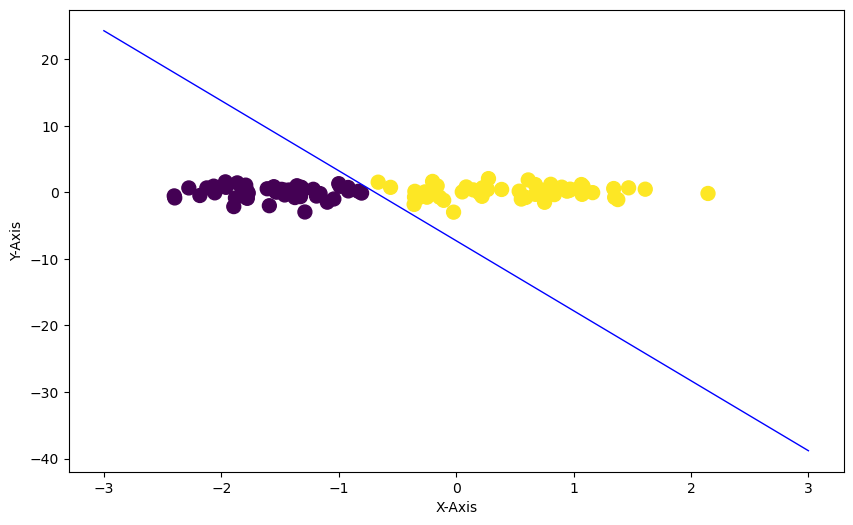

In [27]:
x_input = np.linspace(-3,3,100)
y_input = m * x_input + b

plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='b',linewidth =1)
plt.scatter(X[:,0],X[:,1],c=y,s=100)
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')

plt.show()

In [28]:
def perceptron(X,y):
    m = []
    b = []
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(200):  # the 200 is epoch
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))  # Dot product of datapoints and weights
        weights = weights + lr * (y[j] - y_hat) * X[j]
        
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
    return m,b

m,b = perceptron(X,y)

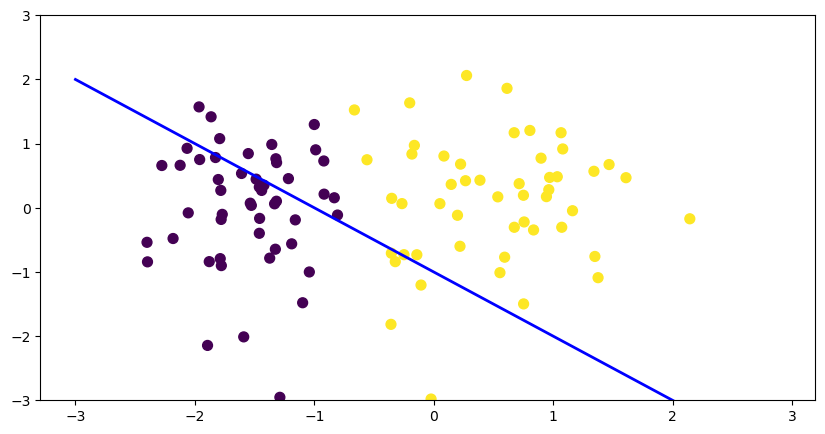

In [29]:
fig,ax = plt.subplots(figsize = (10,5))

x_i = np.arange(-3,3,0.1)
y_i = x_i * m[0] + b[0]

ax.scatter(X[:,0],X[:,1],c=y,s=50)
line = ax.plot(x_i,x_i * m[0] + b[0],'b',linewidth=2)
plt.ylim(-3,3)
plt.show()